In [85]:
import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt
import json
from sklearn.linear_model import Ridge, Lasso
from sklearn.grid_search import GridSearchCV
%matplotlib inline

pd.options.display.max_columns = 50
pd.options.display.max_colwidth = 300

In [109]:
data = pd.read_csv('..//datasets/train.tsv', sep='\t', na_values='?')

# Extract the title and body from the boilerplate JSON text
data['title'] = data.boilerplate.map(lambda x: json.loads(x).get('title', '')).fillna('')
data['body'] = data.boilerplate.map(lambda x: json.loads(x).get('body', '')).fillna('')


In [110]:
data[['title', 'label']].head()



,title,label
0,"IBM Sees Holographic Calls Air Breathing Batteries ibm sees holographic calls, air-breathing batteries",0
1,"The Fully Electronic Futuristic Starting Gun That Eliminates Advantages in Races the fully electronic, futuristic starting gun that eliminates advantages in races the fully electronic, futuristic starting gun that eliminates advantages in races",1
2,Fruits that Fight the Flu fruits that fight the flu | cold & flu | men's health,1
3,10 Foolproof Tips for Better Sleep,1
4,The 50 Coolest Jerseys You Didn t Know Existed coolest jerseys you haven't seen,0


In [111]:
data['recipe'] = data['title'].str.lower().str.contains('recipe')
data['electronic'] = data['title'].str.lower().str.contains('electronic')
data['tips'] = data['title'].str.lower().str.contains('tips')

In [112]:
def examine_coefficients(model, df):
    df = pd.DataFrame(
        { 'Coefficient' : model.coef_[0] , 'Feature' : df.columns}
    ).sort_values(by='Coefficient')
    return df[df.Coefficient !=0 ]

In [117]:

from sklearn.linear_model import LogisticRegression

x = data[[
        'recipe',
        'electronic',
        'tips'
    ]]
y = data.label


model = LogisticRegression() 

model.fit(x, y) # This fits the model to learn the coefficients
print examine_coefficients(model, x)
print "\nModel score =", model.score(x,y)

   Coefficient     Feature
1    -0.441721  electronic
2     0.620250        tips
0     2.482849      recipe

Model score = 0.593373901285


In [62]:
from sklearn.feature_extraction.text import CountVectorizer
v = CountVectorizer(
    binary=True,  # Create binary features
    stop_words='english', # Ignore common words such as 'the', 'and'
    max_features=50, # Only use the top 50 most common words
)


# This builds a matrix with a row per website (or data point) and column per word (using all words in the dataset)
X = v.fit_transform(evergreen.title).todense()
X = pd.DataFrame(X, columns=v.get_feature_names())
X.head()

,10,2011,allrecipes,apple,baked,best,blog,butter,cake,cheese,chicken,chocolate,com,cookies,cooking,cream,cupcakes,day,easy,fashion,food,foods,free,health,healthy,home,homemade,illustrated,insidershealth,kitchen,life,make,new,news,peanut,photos,pie,recipe,recipes,si,sports,style,sweet,swimsuit,technology,time,tips,video,ways,world
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [119]:
CountVectorizer?

In [122]:
data['body'].head()

0    A sign stands outside the International Business Machines Corp IBM Almaden Research Center campus in San Jose California Photographer Tony Avelar Bloomberg Buildings stand at the International Business Machines Corp IBM Almaden Research Center campus in the Santa Teresa Hills of San Jose Califor...
1    And that can be carried on a plane without the hassle too The Omega E Gun Starting Pistol Omega It s easy to take for granted just how insanely close some Olympic races are and how much the minutiae of it all can matter The perfect example is the traditional starting gun Seems easy You pull a tr...
2    Apples The most popular source of antioxidants in our diet one apple has an antioxidant effect equivalent to 1 500 mg of vitamin C Apples are loaded with protective flavonoids which may prevent heart disease and cancer Next Papayas With 250 percent of the RDA of vitamin C a papaya can help kick ...
3    There was a period in my life when I had a lot of problems with sleep It took me

In [125]:
body_talk = v.fit_transform(evergreen.body).todense()
body_talk = pd.DataFrame(body_talk, columns=v.get_feature_names())
body_talk

,10,add,best,bowl,com,cup,day,don,easy,food,good,great,high,ingredients,just,know,large,let,like,little,ll,look,love,make,making,minutes,need,new,people,place,really,recipe,recipes,right,salt,set,small,sugar,sure,think,time,try,use,used,using,ve,want,way,work,world
0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,1,1,0,0,0,0,0,0,1,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,1,1,0,0,0,1,1
1,0,0,1,0,0,0,0,1,1,0,0,0,0,0,1,0,0,0,1,0,0,1,0,1,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,1,1,0,1,0,0,0,1,1,0,1
2,0,0,0,0,1,0,0,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,1,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,1,1,1,0,0,0,1,0,0,0
4,1,0,1,0,0,1,1,1,0,0,1,1,1,1,1,1,0,1,1,1,0,1,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,1,0,0,1,1
5,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0
6,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
7,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0
8,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
9,1,1,1,1,0,1,1,1,0,0,1,0,0,0,1,1,0,0,1,0,0,1,1,1,0,1,1,1,0,0,1,1,1,0,0,0,0,1,0,1,1,1,0,1,0,0,0,0,0,0


In [128]:
body_talk.sum().sort_values(ascending=False)

like           2968
just           2945
make           2758
time           2595
minutes        1926
new            1910
use            1905
don            1889
recipe         1883
add            1819
good           1765
way            1740
food           1730
10             1697
little         1610
cup            1595
best           1550
know           1547
day            1543
want           1475
need           1462
people         1462
place          1451
ve             1440
large          1410
using          1383
let            1366
recipes        1364
used           1359
high           1348
great          1337
com            1331
really         1328
right          1323
ingredients    1313
salt           1312
bowl           1300
sugar          1279
small          1270
think          1261
ll             1253
love           1251
easy           1246
work           1244
look           1212
world          1196
set            1195
sure           1189
try            1182
making         1179


In [129]:
body_talk.columns

Index([u'10', u'add', u'best', u'bowl', u'com', u'cup', u'day', u'don',
       u'easy', u'food', u'good', u'great', u'high', u'ingredients', u'just',
       u'know', u'large', u'let', u'like', u'little', u'll', u'look', u'love',
       u'make', u'making', u'minutes', u'need', u'new', u'people', u'place',
       u'really', u'recipe', u'recipes', u'right', u'salt', u'set', u'small',
       u'sugar', u'sure', u'think', u'time', u'try', u'use', u'used', u'using',
       u've', u'want', u'way', u'work', u'world'],
      dtype='object')

In [120]:
X.sum().sort_values(ascending=False)    ## gives the counts for each of the columns

recipe            580
com               572
recipes           397
food              301
chocolate         260
sports            257
video             227
news              218
best              204
fashion           179
10                172
health            169
new               162
chicken           160
kitchen           159
cake              157
blog              155
make              154
cheese            128
world             119
cookies           118
cooking           116
life              114
swimsuit          111
illustrated       109
butter            108
cream             105
technology         98
easy               95
cupcakes           95
healthy            95
photos             92
allrecipes         90
home               89
si                 89
style              86
tips               85
baked              84
peanut             82
ways               81
insidershealth     79
free               78
foods              78
pie                76
sweet              75
time      

# Making the model

In [133]:
my_xs = pd.DataFrame(X).join(pd.DataFrame(body_talk), lsuffix='_title', rsuffix='_body')

In [134]:
my_xs.head()

,10_title,2011,allrecipes,apple,baked,best_title,blog,butter,cake,cheese,chicken,chocolate,com_title,cookies,cooking,cream,cupcakes,day_title,easy_title,fashion,food_title,foods,free,health,healthy,...,minutes,need,new_body,people,place,really,recipe_body,recipes_body,right,salt,set,small,sugar,sure,think,time_body,try,use,used,using,ve,want,way,work,world_body
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,1,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,1,1,0,0,0,1,1
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,1,1,0,0,0,0,0,0,0,0,0,0,1,1,0,1,0,0,0,1,1,0,1
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,...,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,1,1,1,0,0,0,1,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,1,0,0,1,1


In [137]:
logistic_model_1 = LogisticRegression(penalty='l1')  ## 'l1' (L1) sets to lasso

In [138]:
logistic_model_1.fit(my_xs, y)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l1', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [139]:
logistic_model_1.score(my_xs,y)

0.78526031102096006

In [165]:
logistic_model_2 = LogisticRegression(penalty='l1', C=0.1) ## c is like alpha. 
                                                          ## it is the degree to which coeficients are penalized
                                                          ## smaller values = bigger penalty

In [163]:
logistic_model_2.fit(my_xs, y)

LogisticRegression(C=0.1, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l1', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [164]:
logistic_model_2.score(my_xs, y)

0.7807978363759297

In [169]:
logistic_model_3 = LogisticRegression(penalty='l1', C=10)

In [171]:
logistic_model_3.fit(my_xs,y)

LogisticRegression(C=10, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l1', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [172]:
logistic_model_3.score(my_xs, y)

0.78458417849898576

In [173]:
logistic_model_4 = LogisticRegression(penalty='l2', C=.1)

In [174]:
logistic_model_4.fit(my_xs, y)

LogisticRegression(C=0.1, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [175]:
logistic_model_4.score(my_xs, y)

0.78242055442866798

In [176]:
logistic_model_5 = LogisticRegression(penalty='l2', C=10)
logistic_model_5.fit(my_xs, y)
logistic_model_5.score(my_xs, y)

0.78471940500338067

In [177]:
logistic_model_6 = LogisticRegression(penalty='l2', C=1)
logistic_model_6.fit(my_xs, y)
logistic_model_6.score(my_xs, y)

0.78444895199459097

### Do grid search. 
### iterate over:
- L1 and L2 penalty
- 5 different C values

In [178]:
from sklearn.grid_search import GridSearchCV

In [180]:
parameters = {
    'penalty': ['l1', 'l2'],
    'C': [0.01, 0.1, 1, 10, 23.5, 50]
}
model_i_am_testing = LogisticRegression()


In [186]:
grid_search = GridSearchCV(estimator=model_i_am_testing, ## tell it what model to use
                          param_grid=parameters,   ## I set this above
                          verbose=10,
                          cv=6)             ## how many cross-validations to use. should also do test/train/split

In [185]:
grid_search

GridSearchCV(cv=6, error_score='raise',
       estimator=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'penalty': ['l1', 'l2'], 'C': [0.01, 0.1, 1, 10, 23.5, 50]},
       pre_dispatch='2*n_jobs', refit=True, scoring=None, verbose=10)

In [187]:
grid_search.fit(my_xs,y)   ## this creates six different models for each combination of penalty and C

Fitting 6 folds for each of 12 candidates, totalling 72 fits
[CV] penalty=l1, C=0.01 ..............................................
[CV] ..................... penalty=l1, C=0.01, score=0.740470 -   0.0s
[CV] penalty=l1, C=0.01 ..............................................
[CV] ..................... penalty=l1, C=0.01, score=0.747770 -   0.0s
[CV] penalty=l1, C=0.01 ..............................................
[CV] ..................... penalty=l1, C=0.01, score=0.740470 -   0.0s
[CV] penalty=l1, C=0.01 ..............................................
[CV] ..................... penalty=l1, C=0.01, score=0.778589 -   0.0s
[CV] penalty=l1, C=0.01 ..............................................
[CV] ..................... penalty=l1, C=0.01, score=0.749188 -   0.0s
[CV] penalty=l1, C=0.01 ..............................................


[Parallel(n_jobs=1)]: Done   1 tasks       | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done   4 tasks       | elapsed:    0.1s


[CV] ..................... penalty=l1, C=0.01, score=0.745735 -   0.0s
[CV] penalty=l2, C=0.01 ..............................................
[CV] ..................... penalty=l2, C=0.01, score=0.764801 -   0.0s
[CV] penalty=l2, C=0.01 ..............................................
[CV] ..................... penalty=l2, C=0.01, score=0.774534 -   0.0s
[CV] penalty=l2, C=0.01 ..............................................
[CV] ..................... penalty=l2, C=0.01, score=0.772101 -   0.0s
[CV] penalty=l2, C=0.01 ..............................................
[CV] ..................... penalty=l2, C=0.01, score=0.795620 -   0.0s
[CV] penalty=l2, C=0.01 ..............................................
[CV] ..................... penalty=l2, C=0.01, score=0.774351 -   0.0s
[CV] penalty=l2, C=0.01 ..............................................


[Parallel(n_jobs=1)]: Done   7 tasks       | elapsed:    0.3s
[Parallel(n_jobs=1)]: Done  12 tasks       | elapsed:    0.4s


[CV] ..................... penalty=l2, C=0.01, score=0.769293 -   0.0s
[CV] penalty=l1, C=0.1 ...............................................
[CV] ...................... penalty=l1, C=0.1, score=0.768856 -   0.0s
[CV] penalty=l1, C=0.1 ...............................................
[CV] ...................... penalty=l1, C=0.1, score=0.766423 -   0.0s
[CV] penalty=l1, C=0.1 ...............................................
[CV] ...................... penalty=l1, C=0.1, score=0.768856 -   0.0s
[CV] penalty=l1, C=0.1 ...............................................
[CV] ...................... penalty=l1, C=0.1, score=0.793998 -   0.0s
[CV] penalty=l1, C=0.1 ...............................................
[CV] ...................... penalty=l1, C=0.1, score=0.775162 -   0.0s
[CV] penalty=l1, C=0.1 ...............................................


[Parallel(n_jobs=1)]: Done  17 tasks       | elapsed:    0.6s


[CV] ...................... penalty=l1, C=0.1, score=0.770918 -   0.0s
[CV] penalty=l2, C=0.1 ...............................................
[CV] ...................... penalty=l2, C=0.1, score=0.766423 -   0.0s
[CV] penalty=l2, C=0.1 ...............................................
[CV] ...................... penalty=l2, C=0.1, score=0.775345 -   0.0s
[CV] penalty=l2, C=0.1 ...............................................
[CV] ...................... penalty=l2, C=0.1, score=0.778589 -   0.0s
[CV] penalty=l2, C=0.1 ...............................................
[CV] ...................... penalty=l2, C=0.1, score=0.795620 -   0.0s
[CV] penalty=l2, C=0.1 ...............................................
[CV] ...................... penalty=l2, C=0.1, score=0.775162 -   0.1s
[CV] penalty=l2, C=0.1 ...............................................
[CV] ...................... penalty=l2, C=0.1, score=0.773355 -   0.0s
[CV] penalty=l1, C=1 .................................................
[CV] .

[Parallel(n_jobs=1)]: Done  24 tasks       | elapsed:    0.9s


[CV] ........................ penalty=l1, C=1, score=0.775162 -   0.0s
[CV] penalty=l1, C=1 .................................................
[CV] ........................ penalty=l1, C=1, score=0.770918 -   0.0s
[CV] penalty=l2, C=1 .................................................
[CV] ........................ penalty=l2, C=1, score=0.773723 -   0.1s
[CV] penalty=l2, C=1 .................................................
[CV] ........................ penalty=l2, C=1, score=0.773723 -   0.0s
[CV] penalty=l2, C=1 .................................................
[CV] ........................ penalty=l2, C=1, score=0.774534 -   0.0s
[CV] penalty=l2, C=1 .................................................


[Parallel(n_jobs=1)]: Done  31 tasks       | elapsed:    1.2s


[CV] ........................ penalty=l2, C=1, score=0.795620 -   0.1s
[CV] penalty=l2, C=1 .................................................
[CV] ........................ penalty=l2, C=1, score=0.777597 -   0.0s
[CV] penalty=l2, C=1 .................................................
[CV] ........................ penalty=l2, C=1, score=0.771730 -   0.0s
[CV] penalty=l1, C=10 ................................................
[CV] ....................... penalty=l1, C=10, score=0.773723 -   0.0s
[CV] penalty=l1, C=10 ................................................
[CV] ....................... penalty=l1, C=10, score=0.775345 -   0.0s
[CV] penalty=l1, C=10 ................................................
[CV] ....................... penalty=l1, C=10, score=0.773723 -   0.0s
[CV] penalty=l1, C=10 ................................................
[CV] ....................... penalty=l1, C=10, score=0.795620 -   0.0s
[CV] penalty=l1, C=10 ................................................
[CV] .

[Parallel(n_jobs=1)]: Done  40 tasks       | elapsed:    1.6s


[CV] ....................... penalty=l2, C=10, score=0.773723 -   0.1s
[CV] penalty=l2, C=10 ................................................
[CV] ....................... penalty=l2, C=10, score=0.796431 -   0.1s
[CV] penalty=l2, C=10 ................................................
[CV] ....................... penalty=l2, C=10, score=0.778409 -   0.1s
[CV] penalty=l2, C=10 ................................................
[CV] ....................... penalty=l2, C=10, score=0.774167 -   0.1s
[CV] penalty=l1, C=23.5 ..............................................
[CV] ..................... penalty=l1, C=23.5, score=0.772912 -   0.1s
[CV] penalty=l1, C=23.5 ..............................................
[CV] ..................... penalty=l1, C=23.5, score=0.775345 -   0.0s
[CV] penalty=l1, C=23.5 ..............................................
[CV] ..................... penalty=l1, C=23.5, score=0.773723 -   0.0s
[CV] penalty=l1, C=23.5 ..............................................
[CV] .

[Parallel(n_jobs=1)]: Done  49 tasks       | elapsed:    2.1s


[CV] ..................... penalty=l2, C=23.5, score=0.774534 -   0.1s
[CV] penalty=l2, C=23.5 ..............................................
[CV] ..................... penalty=l2, C=23.5, score=0.775345 -   0.1s
[CV] penalty=l2, C=23.5 ..............................................
[CV] ..................... penalty=l2, C=23.5, score=0.773723 -   0.1s
[CV] penalty=l2, C=23.5 ..............................................
[CV] ..................... penalty=l2, C=23.5, score=0.796431 -   0.1s
[CV] penalty=l2, C=23.5 ..............................................
[CV] ..................... penalty=l2, C=23.5, score=0.778409 -   0.1s
[CV] penalty=l2, C=23.5 ..............................................
[CV] ..................... penalty=l2, C=23.5, score=0.774167 -   0.1s
[CV] penalty=l1, C=50 ................................................
[CV] ....................... penalty=l1, C=50, score=0.773723 -   0.0s
[CV] penalty=l1, C=50 ................................................
[CV] .

[Parallel(n_jobs=1)]: Done  60 tasks       | elapsed:    2.7s


[CV] ....................... penalty=l1, C=50, score=0.778409 -   0.0s
[CV] penalty=l1, C=50 ................................................
[CV] ....................... penalty=l1, C=50, score=0.774167 -   0.0s
[CV] penalty=l2, C=50 ................................................
[CV] ....................... penalty=l2, C=50, score=0.773723 -   0.1s
[CV] penalty=l2, C=50 ................................................
[CV] ....................... penalty=l2, C=50, score=0.775345 -   0.1s
[CV] penalty=l2, C=50 ................................................
[CV] ....................... penalty=l2, C=50, score=0.773723 -   0.1s
[CV] penalty=l2, C=50 ................................................
[CV] ....................... penalty=l2, C=50, score=0.796431 -   0.1s
[CV] penalty=l2, C=50 ................................................
[CV] ....................... penalty=l2, C=50, score=0.778409 -   0.1s
[CV] penalty=l2, C=50 ................................................
[CV] .

[Parallel(n_jobs=1)]: Done  71 tasks       | elapsed:    3.3s
[Parallel(n_jobs=1)]: Done  72 out of  72 | elapsed:    3.3s finished


GridSearchCV(cv=6, error_score='raise',
       estimator=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'penalty': ['l1', 'l2'], 'C': [0.01, 0.1, 1, 10, 23.5, 50]},
       pre_dispatch='2*n_jobs', refit=True, scoring=None, verbose=10)

In [188]:
grid_search.best_score_

0.77876943881000671

In [189]:
grid_search.best_estimator_

LogisticRegression(C=23.5, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [190]:
grid_search.best_estimator_.fit(my_xs, y)

LogisticRegression(C=23.5, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [194]:
grid_search.best_estimator_.score(my_xs, y)    ## tests the best model against the whole data set

0.78485463150777557

In [192]:
from sklearn.metrics import confusion_matrix, classification_report

In [193]:
predictions = grid_search.best_estimator_.predict(my_xs)

In [197]:
confusion_matrix(y, predictions)

array([[3198,  401],
       [1190, 2606]])

In [198]:
print classification_report(y, predictions)

             precision    recall  f1-score   support

          0       0.73      0.89      0.80      3599
          1       0.87      0.69      0.77      3796

avg / total       0.80      0.78      0.78      7395



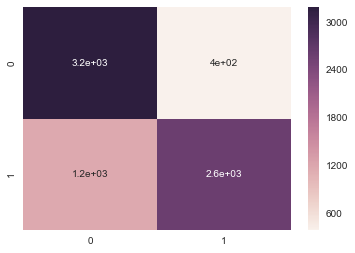

In [200]:
import seaborn as sns
sns.heatmap(confusion_matrix(y, predictions), annot=True)

In [201]:
column1 = range(1,100,2)

In [203]:
print column1

[1, 3, 5, 7, 9, 11, 13, 15, 17, 19, 21, 23, 25, 27, 29, 31, 33, 35, 37, 39, 41, 43, 45, 47, 49, 51, 53, 55, 57, 59, 61, 63, 65, 67, 69, 71, 73, 75, 77, 79, 81, 83, 85, 87, 89, 91, 93, 95, 97, 99]


In [204]:
column1 = [x for x in range(0,10)]

In [205]:
column2 = [y for y in range(10,20)]

In [212]:
my_data = {}
x_list = []
y_list = []
z_list = []

for x in ['$50,000', '$60,000']:
    my_data['x'] = column1[1]
    my_data['y'] = column2[0]
    my_data['other salary'] = '$55,000'
    x_list.append(column1[1])
    y_list.append(column2[0])
    z_list.append(x)
    
my_data

{'other salary': '$55,000', 'x': 1, 'y': 10}

In [213]:
y_list, x_list, z_list

([10, 10], [1, 1], ['$50,000', '$60,000'])

In [215]:
empty_dataframe = pd.DataFrame()

In [216]:
empty_dataframe['salary'] = '55,000'

In [217]:
empty_dataframe

,salary


In [ ]:
import sklearn
import sklearn.linear_model
from sklearn.linear_model import LinearRegression

In [ ]:
divvy_data = pd.read_csv('importblablabla.csvwhatever')


# This is generally how you will model in any sklearn machine learning technique

In [ ]:
# step 1: instantiate your class

linear_reg = LinearRegression()

# step 2: if you haven't already, get your x and y variables ready

x = xdata     ## these don't have to be from the same dataframe
y = ydata

# step 3: fit xs and ys to your machine learning technique

model_1 = linear_reg.fit(x, y)

# step 4: check the score of your model

model_1.score(x,y)   ## here we are checking the score of all of our data
                     ## output here is r-squared if it's a linear model

# step 5: get predictions if you want

predictions = model_1.predict(x)  ## we only put xs here because we want our y-hats / estimates



## logistic regression

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
## step 1: instantiate your class

logistic_reg = LogisticRegression()

## step 2: get xs and ys

y = whatever_categorical_variable
x = whatever_variable(s)

## step 3: fit xs and ys to your model

model_2 = logistic_reg.fit(x,y)

## step 4: check model score

model_2.score(x,y)

## step 5: get predictions if you want

predicted_class = model_2.predict(x)   ## just xs go here because you want y-hat

## if you want to look at probabilities that fall into a given class
## lets you adjust the threshold for predictions

predicted_probabilities = model_2.proba(x)

## look at other classification techniques

from sklearn.metrics import confusion_matrix, classification_report

confusion_matrix(y, predicted_class)  ## true values, predicted values

# confusion table looks like:
# y-hat = 0 | y-hat = 1
# y = 0 ->
# y = 1 -> 

## classification report

classification_report(y, predicted_class)  ## (actual y, predicted y)



## test/train/split

from sklearncross_validation import train_test_split     ## may be different versions of this that are a little bit different

# this adds an extra step because we need to define our splits

x_train, x_test, y_train, y_test = train_test_split(x,y) ## default training set is 33%, but you can change it

## you should always check to make sure the shape is what you expect it to be

x_train.shape, x_test.shape, y_train.shape, y_test.shape

## now we model like before

## instantiate the class

logistic_reg = LogisticRegression()

## fit the x and y, but use the training data to the model

model_3 = logistic_reg.fit(x_train, y_train)  ## fitting the model based on training set

model_3.score(x_train, y_train) ## how well does the model fit the data we gave it

## how does the model handle the new data? (e.g. the test set)

model_3.score(x_test, y_test)  ## how well does the model fit the new data?

## can do all of the same classification reports and confusion matrix
